# Data Analysis with Python

### Introdution

From the housing.csv dataset, this work aims to perform all the necessary exploratory analysis and prepare the data for machine learning algorithms using Scikit-Learn. Trainning a Linear Regression Model and a Random Forest Regressor Model that predicts the target variable (median_house_value) and which RMSE value should be less than or equal to 69000.

- Installing the main packages

In [27]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

- Reading the dataset

In [28]:
housing = pd.read_csv('housing.csv')
housing = housing[['longitude','latitude','ocean_proximity','housing_median_age',
                   'total_rooms','total_bedrooms', 'population', 'households','median_income','median_house_value']] 
housing.head()

,longitude,latitude,ocean_proximity,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,NEAR BAY,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,NEAR BAY,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,NEAR BAY,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,NEAR BAY,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,NEAR BAY,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### Pre-processing Data

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   ocean_proximity     20640 non-null  object 
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20433 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   median_house_value  20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [31]:
housing.isnull().sum()

longitude               0
latitude                0
ocean_proximity         0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [32]:
housing[housing.isnull().any(axis=1)]

,longitude,latitude,ocean_proximity,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,NEAR BAY,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0
341,-122.17,37.75,NEAR BAY,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0
538,-122.28,37.78,NEAR BAY,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0
563,-122.24,37.75,NEAR BAY,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0
696,-122.10,37.69,NEAR BAY,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,NEAR OCEAN,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0
20268,-119.18,34.19,NEAR OCEAN,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0
20372,-118.88,34.17,<1H OCEAN,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0
20460,-118.75,34.29,<1H OCEAN,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0


In [33]:
housing.dropna(inplace=True)

In [34]:
housing.isnull().sum()

longitude             0
latitude              0
ocean_proximity       0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [35]:
housing = pd.get_dummies(housing, columns = ['ocean_proximity'])

In [36]:
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [37]:
housing.rename(columns = {'ocean_proximity_<1H OCEAN': '1H OCEAN', 'ocean_proximity_INLAND': 'INLAND', 'ocean_proximity_ISLAND': 'ISLAND',
                         'ocean_proximity_NEAR BAY': 'NEAR BAY', 'ocean_proximity_NEAR OCEAN': 'NEAR OCEAN'}, inplace = True)

In [38]:
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

### Exploratory Data Analysis (EDA)

#### Quartile range

In [54]:
Q1 = housing['median_house_value'].quantile(0.25)
Q2 = housing['median_house_value'].quantile(0.5)
Q3 = housing['median_house_value'].quantile(0.75)
print('Lower quartile ', Q1)
print('Second quartile (Median)', Q2)
print('Upper quartile ', Q3)

Lower quartile  119500.0
Second quartile (Median) 179700.0
Upper quartile  264700.0


- Interquartile range (IQR)

In [55]:
IQR = Q3 - Q1
print('Interquartile range', IQR)

Interquartile range 145200.0


- Checking the potential unusual observations (outliers) in the data set:

In [56]:
limit_1 = (np.percentile(housing['median_house_value'], 75) + 3 * (np.percentile(housing['median_house_value'], 75) - np.percentile(housing['population'], 25)))
limit_2 = (np.percentile(housing['median_house_value'], 75) + 1.5 * (np.percentile(housing['median_house_value'], 75) - np.percentile(housing['population'], 25)))
limit_3 = (np.percentile(housing['median_house_value'], 25) - 1.5 * (np.percentile(housing['median_house_value'], 75) - np.percentile(housing['population'], 25)))
limit_4 = (np.percentile(housing['median_house_value'], 25) - 3 * (np.percentile(housing['median_house_value'], 75) - np.percentile(housing['population'], 25)))


In [57]:
print('Lower Outliers: ', housing.loc[(housing.median_house_value >= limit_2) & (housing.median_house_value <= limit_1), 'median_house_value'].count())
print('Upper Outliers: ', housing.loc[(housing.median_house_value >= limit_4) & (housing.median_house_value <= limit_3), 'median_house_value'].count())
print('Extremes Points: ', housing.loc[(housing.median_house_value >= limit_1) | (housing.median_house_value <= limit_4), 'median_house_value'].count())

Lower Outliers:  0
Upper Outliers:  0
Extremes Points:  0


#### Boxplots

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


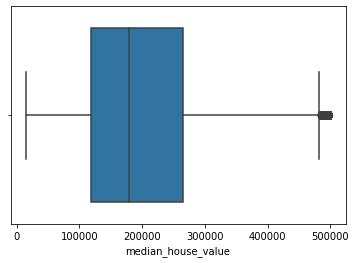

In [58]:
sns.boxplot(housing['median_house_value'])

#### Histogram

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


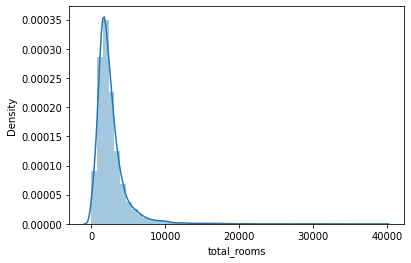

In [63]:
sns.distplot(housing['total_rooms']) 

In [64]:
n_data = len(housing.total_rooms)
n_bins = np.sqrt(n_data)
n_bins = int(n_bins)

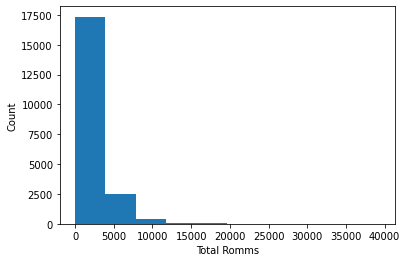

In [65]:
plt.hist(housing.total_rooms)
plt.xlabel('Total Romms')
plt.ylabel('Count')

plt.show()

#### Scatterplots and Correlation

Text(0.5, 1.0, 'Relationship between Population and Total_Rooms')

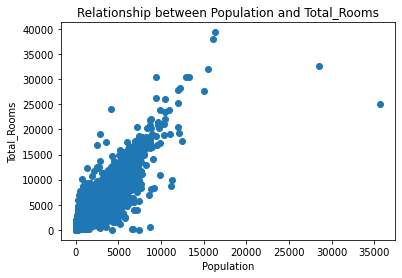

In [66]:
plt.scatter('population', 'total_rooms', data=X)
plt.xlabel('Population')
plt.ylabel('Total_Rooms')
plt.title('Relationship between Population and Total_Rooms')

### Preparing the Dataset for the

- Splitting the dataset into 'train' and 'test' sets. In this case, it will be applied 30% for 'test'

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

- Selecting the columns for the X variable and setting y in the target variable, as this will be dependent variable:

In [69]:
feature_col = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms', 
               'population', 'households','median_income', '1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
target_col =  ['median_house_value']
X = housing[feature_col].values
y = housing[target_col].values.ravel()

In [70]:
X = housing.loc[:,feature_col] 
Y = housing.loc[:,target_col]

- Returns a (random) sample of n elements, in this case example 4 elements:

In [71]:
X.sample(4) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17279,-119.75,34.40,31.0,1997.0,299.0,826.0,301.0,6.8927,0,0,0,0,1
6411,-118.02,34.12,36.0,1471.0,246.0,751.0,230.0,5.4555,0,1,0,0,0
1442,-122.00,37.99,28.0,4035.0,641.0,1881.0,659.0,5.4607,0,1,0,0,0
13886,-115.75,35.23,5.0,208.0,78.0,132.0,56.0,2.5333,0,1,0,0,0


### Linear Regression Model

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [79]:
mlr_skl = LinearRegression()
mlr_skl.fit(X_train, y_train.ravel()) 

LinearRegression()

- Model Itercepto(b0)

In [80]:
print(mlr_skl.intercept_)

-2202935.7371625025


- Angular Coefficient (b1)

In [81]:
mlr_skl.coef = pd.DataFrame(mlr_skl.coef_,X.columns, columns=['Coefficiente'])
mlr_skl.coef.round(4)

,Coefficiente
longitude,-26389.5868
latitude,-25115.5876
housing_median_age,1103.7150
total_rooms,-6.5185
total_bedrooms,105.6840
population,-35.2604
households,38.7288
median_income,39282.2347
1H OCEAN,-30229.5329
INLAND,-70161.8666


In [90]:
y_pred_mlr = mlr_skl.predict(X_test) 
MSE_mlr = mean_squared_error(y_test,y_pred_mlr)
MSE_mlr

4614164009.958682

In [91]:
RMSE_mlr = math.sqrt(MSE_mlr)
print("Root Mean Square Error:\n")
print(RMSE_mlr)

Root Mean Square Error:

67927.63804195375


### Random Forest Regressor Model

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [86]:
mrf_skl = RandomForestRegressor(n_estimators=300,min_samples_leaf=2,random_state=0,n_jobs=-1)
mrf_skl.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=2, n_estimators=300, n_jobs=-1,
                      random_state=0)

In [93]:
predict  = mrf_skl.predict(X_test)

In [92]:
y_pred_mrf = mrf_skl.predict(X_test) 
MSE_mrf = mean_squared_error(y_test,y_pred_mrf)
MSE_mrf

2356523483.2946224

In [94]:
RMSE_mrf = math.sqrt(MSE_mrf)
print("Root Mean Square Error:\n")
print(RMSE_mrf)

Root Mean Square Error:

48544.036536887026
